# Week 10 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
def newton_vol_put(S, K, T, P, r, q):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 100
    tolerance = 0.00000001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
        vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = P - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        print(i,sigma,diff)
        
    return sigma

## Question 2

In [3]:
impvol = newton_vol_put(172.14, 170, 1/12, 5.00, 0.0169, 0.0051)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month put with strike $ 170' ) 

0 0.30937198446728353 1.147611753417607
1 0.30918344475393805 -0.003665218592146857
2 0.30918344355627375 -2.3282339611796488e-08
The implied volatility is 30.92 % for the one-month put with strike $ 170


## Question 3

In [4]:
AAPL = yf.Ticker('AAPL')
opt = AAPL.option_chain('2022-05-06')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL220506P00100000,2022-04-06 19:04:44,100.0,0.05,NaN,NaN,0.0,0.0,NaN,NaN,0.000000,False,REGULAR,USD
1,AAPL220506P00105000,2022-03-30 16:09:08,105.0,0.03,0.0,0.0,0.0,0.0,NaN,20.0,0.250007,False,REGULAR,USD
2,AAPL220506P00110000,2022-04-06 13:45:03,110.0,0.07,0.0,0.0,0.0,0.0,20.0,25.0,0.250007,False,REGULAR,USD
3,AAPL220506P00115000,2022-04-07 17:45:12,115.0,0.09,0.0,0.0,0.0,0.0,10.0,15.0,0.250007,False,REGULAR,USD
4,AAPL220506P00120000,2022-04-06 13:32:54,120.0,0.12,0.0,0.0,0.0,0.0,2.0,22.0,0.250007,False,REGULAR,USD
5,AAPL220506P00125000,2022-04-07 17:08:25,125.0,0.18,0.0,0.0,0.0,0.0,74.0,1207.0,0.250007,False,REGULAR,USD
6,AAPL220506P00130000,2022-04-07 19:09:32,130.0,0.20,0.0,0.0,0.0,0.0,202.0,1212.0,0.250007,False,REGULAR,USD
7,AAPL220506P00135000,2022-04-07 19:31:36,135.0,0.29,0.0,0.0,0.0,0.0,84.0,252.0,0.250007,False,REGULAR,USD
8,AAPL220506P00140000,2022-04-07 19:46:54,140.0,0.40,0.0,0.0,0.0,0.0,41.0,411.0,0.125009,False,REGULAR,USD
9,AAPL220506P00145000,2022-04-07 19:59:06,145.0,0.65,0.0,0.0,0.0,0.0,56.0,676.0,0.125009,False,REGULAR,USD


In [5]:
import mibian

In [6]:
impliedvol = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    p = mibian.Me([172.14, opt.puts.strike[i], 1.69, 0.51, 28], putPrice = opt.puts.lastPrice[i])
    impliedvol [i] = p.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile')

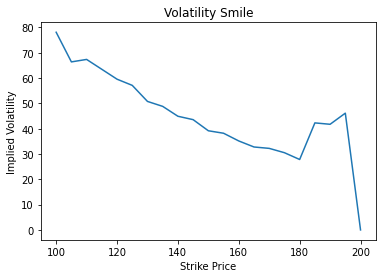

In [7]:
fig = plt.figure()
plt.plot(opt.puts.strike, impliedvol, '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')

## Quetion 4

Text(0.5, 1.0, 'Volatility Smile')

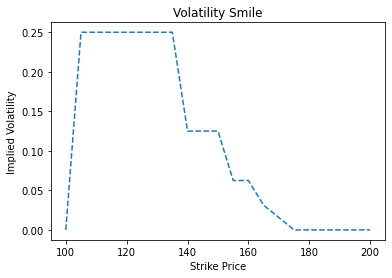

In [8]:
fig = plt.figure()
plt.plot(opt.puts.strike, opt.puts.impliedVolatility, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')

## Question 5

In [9]:
difference = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    difference[i] = impliedvol[i] - opt.puts.impliedVolatility[i]*100

Text(0.5, 1.0, 'Volatility Smile')

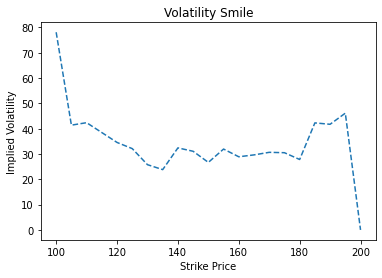

In [10]:
fig = plt.figure()
plt.plot(opt.puts.strike, difference, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')

In [11]:
pp = mibian.Me([172.14, 170, 1.69, 0.51, 28], putPrice = 5.00)
pp.impliedVolatility

32.2265625

## Question 6

In [12]:
import arrow
T = ['2022-04-08','2022-04-14','2022-04-22','2022-04-29','2022-05-06',
     '2022-05-13','2022-05-20','2022-06-17','2022-07-15','2022-09-16',
     '2022-10-21','2022-11-18','2023-01-20','2023-03-17','2023-06-16',
     '2023-09-15','2024-01-19','2024-06-21']

In [13]:
K = [140,150,160,170,180,190,200]
now = arrow.get('2022-04-07')
days = np.zeros((len(T),1))
impliedvol_s = np.zeros((len(K),len(days)))
for j in range(len(days)):
    for i in range(len(K)):
        opt = AAPL.option_chain(T[j])
        temp = arrow.get(T[j])
        delta = temp - now
        days[j] = delta.days
        impliedvol_s [i,j] = opt.puts.impliedVolatility[opt.puts.strike == K[i]]

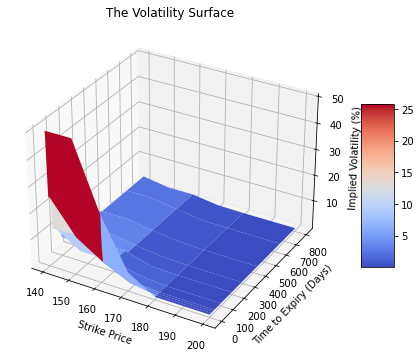

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
K, days = np.meshgrid(K, days)
surf = ax.plot_surface(K, days, impliedvol_s.T*100, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiry (Days)')
ax.set_zlabel('Implied Volatility (%)')
plt.title('The Volatility Surface')
fig.colorbar(surf, shrink=0.5, aspect=5);